### Statistiques descriptives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
table_finale = pd.read_csv("data.csv")

In [4]:
# 1. Nombre de produits N
table_finale.product_id.unique().shape[0]

8199

In [5]:
# 2. Nombre de périodes T
table_finale.order_purchase_timestamp.unique().shape[0]

9

In [6]:
table_finale.shape

(73791, 92)

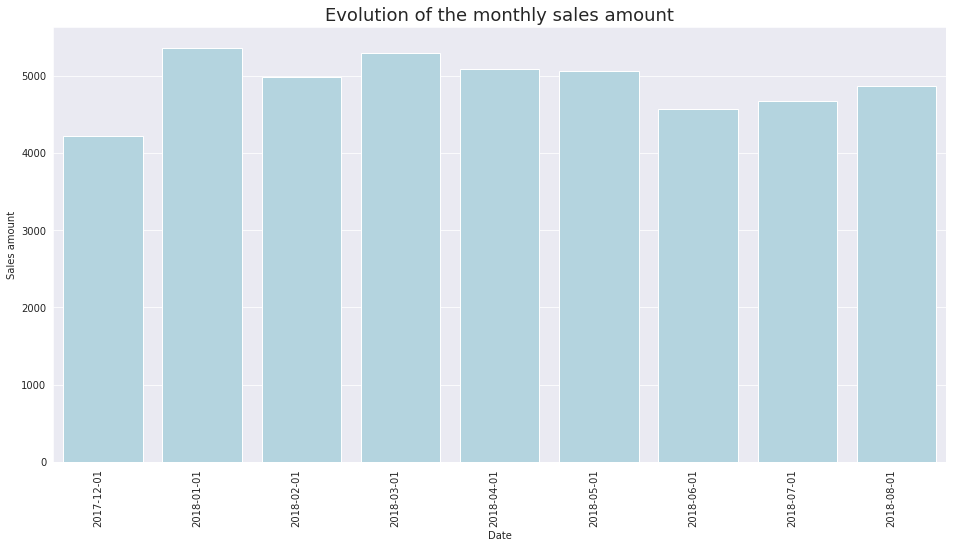

In [10]:
# 3. Nombre de vente par mois
table_to_use = table_finale.groupby("order_purchase_timestamp").agg({"nb_ventes":"sum"}).reset_index()
plt.figure(figsize=(16, 8))
with sns.axes_style("darkgrid"):
    chart = sns.barplot(data=table_to_use, x="order_purchase_timestamp", y="nb_ventes", color='lightblue');
    chart.set_title("Evolution of the monthly sales amount", fontdict={"fontsize":18});
    chart.set(xlabel="Date", ylabel="Sales amount");
    chart.set_xticklabels(labels=table_to_use.order_purchase_timestamp, rotation=90, ha='right');

In [12]:
#4. Le produit le plus vendu 
plus_vendu = table_finale.where(table_finale.nb_ventes == max(table_finale.nb_ventes)).dropna()#.product_category_name
columns_to_keep = plus_vendu.any()
columns_to_keep = np.array(columns_to_keep.where(columns_to_keep == True).dropna().index) # Garder les dummies correspondantes
plus_vendu[columns_to_keep]

,Unnamed: 0,product_id,order_purchase_timestamp,price,freight_value,review_score,taille_com,temps_estim,retard_avance,nb_ventes,cummean_taille_com,cummean_review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_moveis_decoracao
49550,49550.0,7cb2ff3193293db892fd5697aa99a19b,2018-05-01,71.808889,15.328222,4.244444,1182.0,22.0,10.0,45.0,538.166667,4.031381,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,1.0


Il y a un produit qui a été vendu le maximum de fois en un fois (45 fois). Il a un score moyen de 4.24 sur toute la période et un score de 4.03 à la date de vente. Il appartient à la catégorie DECORATION/MEUBLES.

In [14]:
# 5. Le produit le moins vendu 
moins_vendu = table_finale.where(table_finale.nb_ventes == min(table_finale.nb_ventes)).dropna()#.product_category_name
columns_to_keep = moins_vendu.any()
columns_to_keep = np.array(columns_to_keep.where(columns_to_keep == True).dropna().index) # Garder les dummies correspondantes
moins_vendu = moins_vendu[columns_to_keep]
moins_vendu

,Unnamed: 0,product_id,order_purchase_timestamp,price,freight_value,review_score,taille_com,temps_estim,retard_avance,cummean_taille_com,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_portateis_cozinha_e_preparadores_de_alimentos,product_category_name_relogios_presentes,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
1,1.0,439dee65f97bb5e70b021e1e7cf54a5e,2018-01-01,38.90,15.11,1.0,0.0,25.0,-4.0,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,439dee65f97bb5e70b021e1e7cf54a5e,2018-03-01,38.90,12.69,5.0,65.0,24.0,14.0,31.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,439dee65f97bb5e70b021e1e7cf54a5e,2018-05-01,38.90,16.11,1.0,60.0,30.0,20.0,37.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7.0,439dee65f97bb5e70b021e1e7cf54a5e,2018-07-01,38.90,9.34,5.0,0.0,16.0,11.0,30.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,12.0,8d7d29e5fb9ff5333009326c87fc04e9,2018-03-01,34.99,16.05,1.0,11.0,32.0,25.0,38.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73781,73781.0,a741ba9d329996cf515841327718913d,2018-08-01,119.99,38.39,4.0,44.0,34.0,25.0,22.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73782,73782.0,389d38a555287ebf3413ce43392cf007,2017-12-01,34.99,7.39,5.0,0.0,14.0,12.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73783,73783.0,389d38a555287ebf3413ce43392cf007,2018-01-01,34.99,7.39,5.0,0.0,14.0,12.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73786,73786.0,389d38a555287ebf3413ce43392cf007,2018-04-01,34.99,7.51,5.0,0.0,3.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print("Beaucoup de produits sont vendus une seule fois par mois et cela a été observé pour", moins_vendu.product_id.unique().shape[0], 
      "produits sur la période.")

Beaucoup de produits sont vendus une seule fois par mois et cela a été observé pour 7945 produits sur la période.


In [17]:
print("Il y a", table_finale.product_id.unique().shape[0], "produits en vente")

Il y a 8199 produits en vente


In [18]:
# 6. Indicateurs de tendance centrale et dispersion des variables
stats = table_finale.describe()
stats

,Unnamed: 0,price,freight_value,review_score,taille_com,temps_estim,retard_avance,nb_ventes,cummean_taille_com,cummean_review_score,...,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_portateis_cozinha_e_preparadores_de_alimentos,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
count,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000,...,73791.000000,73791.000000,73791.000000,73791.000000,73791.0,73791.000000,73791.000000,73791.000000,73791.000000,73791.000000
mean,36895.000000,121.636081,20.137515,4.002791,40.809110,23.744969,11.835685,0.598461,38.396974,4.004976,...,0.022198,0.000854,0.000122,0.039151,0.0,0.002561,0.000366,0.043054,0.002561,0.072814
std,21301.771194,178.416129,16.206797,1.348376,71.225055,8.719680,10.076905,1.385942,46.005691,1.010163,...,0.147327,0.029207,0.011043,0.193956,0.0,0.050545,0.019125,0.202980,0.050545,0.259832
min,0.000000,3.490000,0.000000,1.000000,0.000000,-4.000000,-181.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18447.500000,38.000000,13.160000,3.250000,0.000000,19.000000,7.000000,0.000000,1.000000,3.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36895.000000,70.000000,16.280000,5.000000,0.000000,23.000000,12.000000,0.000000,26.600000,4.250000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55342.500000,135.000000,21.190000,5.000000,59.000000,28.000000,17.000000,1.000000,56.333333,4.875000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,73790.000000,3399.990000,375.280000,5.000000,1967.000000,150.000000,147.000000,45.000000,750.761905,5.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


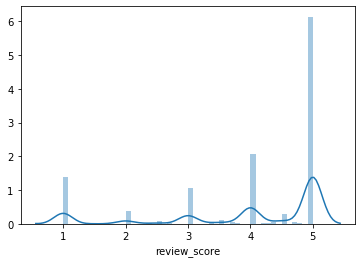

In [19]:
# 7. Distribution Variable d'intérêt
sns.distplot(table_finale.review_score);

In [20]:
# 6. Indicateurs de tendance centrale et dispersion des variables
stats = table_finale.describe()
stats[["price", "cummean_review_score", "nb_ventes", "cummean_taille_com"]] # 4 variables les plus importantes

,price,cummean_review_score,nb_ventes,cummean_taille_com
count,73791.000000,73791.000000,73791.000000,73791.000000
mean,121.636081,4.004976,0.598461,38.396974
std,178.416129,1.010163,1.385942,46.005691
min,3.490000,1.000000,0.000000,0.000000
25%,38.000000,3.500000,0.000000,1.000000
50%,70.000000,4.250000,0.000000,26.600000
75%,135.000000,4.875000,1.000000,56.333333
max,3399.990000,5.000000,45.000000,750.761905
